In [29]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time as time


from bcg_code import *

from IPython.display import clear_output

# Intro plot

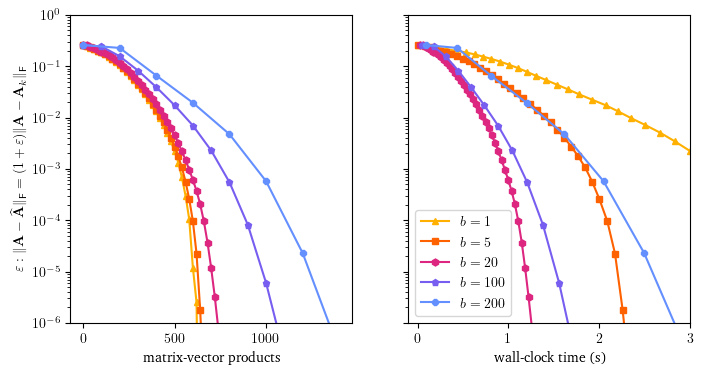

In [100]:
# intro plot

n = 4000
Λ = np.geomspace(1,100,n)


# load experiment
name = 'intro'
Λ = Λ
blocksizes = [1,5,20,100,200]
qs = [650,200,60,11,7]
skips = [20,4,1,1,1]
k = 200

# load data
all_errs,all_times = np.load(f'data/{name}.npy',allow_pickle=True)
err_opt = {k:np.linalg.norm(np.sort(Λ)[:-k])}


fig,axs = plt.subplots(1,2,figsize=(8,4),sharey=True)

axs[0].set_prop_cycle(default_cycler)
axs[1].set_prop_cycle(default_cycler)

for i,(b,q,skip) in enumerate(zip(blocksizes,qs,skips)):

    errs = all_errs[b,k]
    times = all_times[b]
    
    ax = axs[0]
    
    ax.plot(np.arange(0,q+1)[::skip]*b,errs[::skip]/err_opt[k]-1,ms=5,label=f'$b={b}$')
    ax.set_yscale('log')
    ax.set_ylim(1e-6,1e0)
    ax.set_xlabel('matrix-vector products')
    
    # ax.legend()

    ax.set_ylabel(r'$\varepsilon : \|\mathbf{A}-\widehat{\mathbf{A}}\|_{\mathsf{F}} = (1+\varepsilon)\|\mathbf{A}-\mathbf{A}_k\|_{\mathsf{F}}$')
    
    ax = axs[1]
    
    ax.plot(times[::skip],errs[::skip]/err_opt[k]-1,ms=5,label=f'$b={b}$')
    ax.set_xlabel('wall-clock time (s)')
    ax.set_xlim(-.1,3)
    ax.legend()

plt.savefig(f'imgs/intro_{k}.pdf')


# appendix plots

In [171]:
experiments = []

n = 4000
Λ = np.geomspace(1,100,n)

experiments.append({
    'name': 'intro',
    'Λ': Λ,
    'blocksizes': [1,5,20,100,200],
    'qs': [650,200,60,11,7],
    'skips': [20,4,1,1,1],
    'ks': [50,100,200],
    'ylims': [1e-6,1e0],
})

# duplicate eigenvalues
n = 4000
Λ = np.hstack([np.geomspace(1,100,n//2),np.geomspace(1,100,n//2)])

experiments.append({
    'name': 'doubles',
    'Λ': Λ,
    'blocksizes': [1,5,20,100,200],
    'qs': [650,200,60,11,7],
    'skips': [20,4,1,1,1],
    'ks': [50,100,200],
    'ylims': [1e-6,1e0],
})


n = 4000
Λ = np.exp(-(1+np.arange(n))/25)

experiments.append({
    'name': 'fastdecay',
    'Λ': Λ,
    'blocksizes': [1,5,20,100,200],
    'qs': [200,60,20,5,4],
    'skips': [10,2,1,1,1],
    'ks': [50,100,200],
    'ylims': [1e-6,1e4],
})

n = 4000
Λ = np.max([np.exp(-(1+np.arange(n))/25),(1-(1+np.arange(n))/(n+1))/25],axis=0)

experiments.append({
    'name': 'slowdecay',
    'Λ': Λ,
    'blocksizes': [1,5,20,100,200],
    'qs': [400,180,50,13,10],
    'skips': [20,4,1,1,1],
    'ks': [50,100,200],
    'ylims': [1e-5,1e1],
})

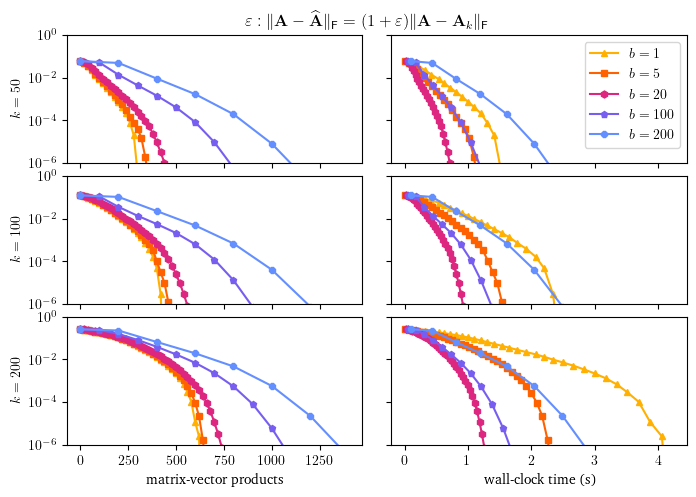

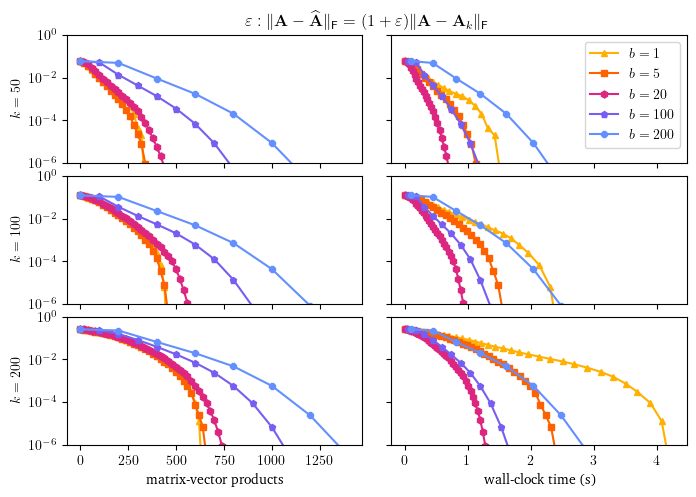

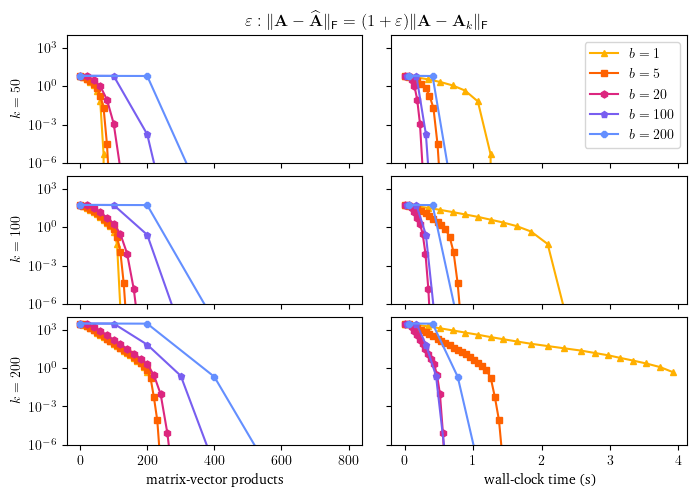

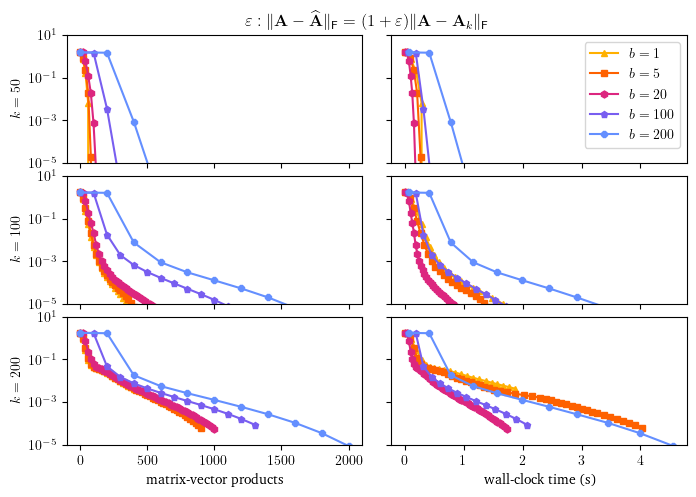

In [172]:
for experiment in experiments:

    # load experiment
    name = experiment['name']
    Λ = experiment['Λ']
    blocksizes = experiment['blocksizes']
    qs = experiment['qs']
    skips = experiment['skips']
    ks = experiment['ks']

    # load data
    all_errs,all_times = np.load(f'data/{name}.npy',allow_pickle=True)
    err_opt = {k:np.linalg.norm(np.sort(Λ)[:-k]) for k in ks}

    # plot results
    fig,axs = plt.subplots(3,2,figsize=(8,5),sharey=True,sharex='col')
    plt.subplots_adjust(wspace=.1,hspace=.1,top=.93)
    
    for ax in axs.flatten():
        ax.set_prop_cycle(default_cycler)

    for j,k in enumerate(ks):

        for i,(b,q,skip) in enumerate(zip(blocksizes,qs,skips)):
        
            errs = all_errs[b,k]
            times = all_times[b]
            
            ax = axs[j,0]

            ax.set_ylabel(f'$k={k}$')
            
            ax.plot(np.arange(0,q+1)[::skip]*b,errs[::skip]/err_opt[k]-1,ms=5,label=f'$b={b}$')
            ax.set_yscale('log')
    
            # ax.axhline(experiment['ylims'][0])
            ax.set_ylim(*experiment['ylims'])
            
        
            
            ax = axs[j,1]

            
            
            ax.plot(times[::skip],errs[::skip]/err_opt[k]-1,ms=5,label=f'$b={b}$')
            # ax.set_xlim(-.1,3)
    

    plt.suptitle(r'$\varepsilon : \|\mathbf{A}-\widehat{\mathbf{A}}\|_{\mathsf{F}} = (1+\varepsilon)\|\mathbf{A}-\mathbf{A}_k\|_{\mathsf{F}}$')

    axs[0,1].legend(loc='upper right')
    axs[2,0].set_xlabel('matrix-vector products')
    axs[2,1].set_xlabel('wall-clock time (s)')

    plt.savefig(f'imgs/{name}.pdf')

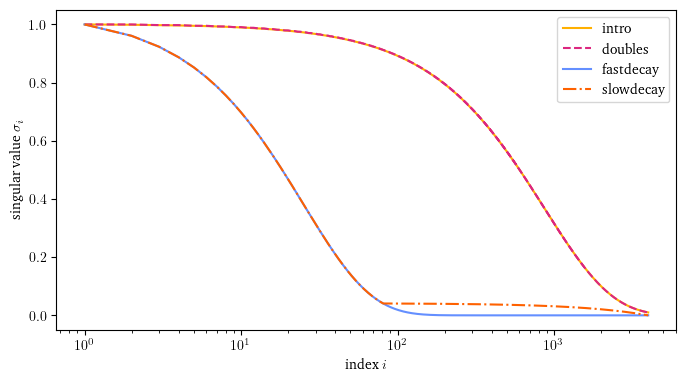

In [176]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

lines = ['-','--','-','-.']

plt.subplots_adjust(bottom=.15,top=.95)

ax.set_prop_cycle(default_cycler)
for i,experiment in enumerate(experiments):

    name = experiment['name']
    Λ = experiment['Λ']

    ax.plot(1+np.arange(n),np.sort(Λ)[::-1]/np.sort(Λ)[-1],marker='None',ls=lines[i],label=name)
    next(ax._get_lines.prop_cycler)
    
ax.legend()
ax.set_xscale('log')

ax.set_xlabel('index $i$')
ax.set_ylabel('singular value $\sigma_i$')

plt.savefig(f'imgs/spectrums.pdf')